# San Francisco Rental Prices Dashboard

In [4]:
# initial imports
import panel as pn
pn.extension('plotly')
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import pylab

# Initialize the Panel Extensions (for Plotly)


In [5]:
load_dotenv()
mapbox_token = os.getenv("MAP_BOX")

### Importing Data from CSV Files

In [6]:
file_path_1=Path("C:\\Users\\vinot\\Fintech\\Udemy\\work_book\\neighborhoods_coordinates.csv")
location_data = pd.read_csv(file_path_1)
file_path_2=Path("C:\\Users\\vinot\\Fintech\\Udemy\\work_book\\sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path_2,index_col="year")

In [7]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


### Panel visualizations

### Function for "Housing Units Per Year".

In [8]:
def housing_units_per_year():
    housing_units_per_year1 = sfo_data['housing_units'].groupby(sfo_data.index).mean()
    housing_units_per_year_plot = plt.figure()
    housing_units_bar = housing_units_per_year1.plot.bar(figsize=(12,8),x='Year',y='Housing Units',title='Housing Units in San-Francisco from 2010 to 2016'), pylab.ylim([360000,390000])
    plt.close(housing_units_per_year_plot)    
    return pn.pane.Matplotlib(housing_units_per_year_plot)

### Function for "Average Gross Rent in San Francisco Per Year".

In [9]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    average_gross_rent1 = sfo_data['gross_rent'].groupby(sfo_data.index).mean()
    average_gross_rent_plot = plt.figure()
    #average_gross_rent_plot = average_gross_rent1.plot(figsize=(10, 10), title ='Average gross rent per Year')
    average_gross_rent_plot2 = average_gross_rent1.plot()
    average_gross_rent_plot2.set_title("Average gross rent per Year")
    plt.close(average_gross_rent_plot)
    return pn.pane.Matplotlib(average_gross_rent_plot)

### Function for "Average Sales Price Per Year".

In [10]:
def average_sales_price():
    """Average Sales Price Per Year."""
    avg_sales_price = sfo_data['sale_price_sqr_foot'].groupby(sfo_data.index).mean()
    avg_sales_price_plot = plt.figure()
    avg_sales_price_plot2 = avg_sales_price.plot()
    avg_sales_price_plot2.set_title("Average Sales Price per Year")
    plt.close(avg_sales_price_plot)
    return pn.pane.Matplotlib(avg_sales_price_plot)

### Function for "Average price by Neighborhood"

In [11]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    location_price = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    location_price.reset_index(inplace=True)
    location_price.rename(columns={"level_0": "year"}, inplace=True)
    average_price_by_neighborhood_plot = location_price.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel="Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",)
    
    return average_price_by_neighborhood_plot

### Function for "Top most Expensive Neighborhoods"

In [12]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    sfo_exp_places = sfo_data.groupby(by="neighborhood").mean()
    sfo_exp_places = sfo_exp_places.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    sfo_exp_places = sfo_exp_places.reset_index()
    sfo_exp_places   
    
    top_most_expensive_neighborhoods_plot = sfo_exp_places.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
    title="Top 10 Expensive Neighborhoods in SFO",
    xlabel="Neighborhood",
    ylabel="Avg. Sale Price per Square Foot",
    height=400,
    rot=90)
    
    return top_most_expensive_neighborhoods_plot

### Function for "Parallel Coordinates"

In [13]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    sfo_exp_places = sfo_data.groupby(by="neighborhood").mean()
    sfo_exp_places = sfo_exp_places.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    sfo_exp_places = sfo_exp_places.reset_index()
    sfo_exp_places
   
    parallel_coordinates_plot = px.parallel_coordinates(
    sfo_exp_places,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title='Average values per neighborhood',
    labels={'neighborhood': "Neighborhood", 
            'sale_price_sqr_foot':'Sales Price per sqf',
           'housing_units':'Housing Units',
           'gross_rent':'Gross rent'},)
    
    return parallel_coordinates_plot
    

### Function for Parallel Categories

In [14]:
def parallel_categories():
    """Parallel Categories Plot."""
    sfo_exp_places = sfo_data.groupby(by="neighborhood").mean()
    sfo_exp_places = sfo_exp_places.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
    sfo_exp_places = sfo_exp_places.reset_index()
    sfo_exp_places
    
    parallel_categories_plot = px.parallel_categories(
    sfo_exp_places,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title='Average values per neighborhood',
    labels={'neighborhood': "Neighborhood", 
            'sale_price_sqr_foot':'Sales Price per sqf',
           'housing_units':'Housing Units',
           'gross_rent':'Gross rent'},) 
       
    
    return parallel_categories_plot

### Function for Map plotting

In [15]:
def neighborhood_map():
    """Neighborhood Map"""
    sfo_location_data = sfo_data.groupby(by="neighborhood").mean()
    sfo_location_data = sfo_location_data.sort_values("sale_price_sqr_foot",ascending=False)
    sfo_location_data = sfo_location_data.reset_index()
    sfo_all_neighborhoods=pd.concat([location_data,
                                sfo_location_data['sale_price_sqr_foot'],
                                sfo_location_data['housing_units'],
                                sfo_location_data['gross_rent']
                               ], axis=1).dropna()
    px.set_mapbox_access_token(mapbox_token)
    map = px.scatter_mapbox(
    sfo_all_neighborhoods,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco")
    plotly_panel = pn.pane.Plotly(map)
    plotly_panel._updates = True
    return plotly_panel

In [16]:
title = pn.pane.Markdown(
    """
# Rental Analysis of San Francisco from 2010 to 2016
""",
    width=800,
)
welcome = pn.pane.Markdown(
    """ Checking"""
)
# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, neighborhood_map())),
    ("Yearly Market Analysis", pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())),
    ("Neighborhood Analysis", pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())),
    (
        "Parallel Plots Analysis",
        pn.Column(parallel_coordinates(), parallel_categories(), width=960),
    ),
)
panel = pn.Column(pn.Row(title), tabs, width=900)

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] HoloViews(Bars)
        [3] Column(width=960)
            [0] Plotly(Figure)
            [1] Plotly(Figure)
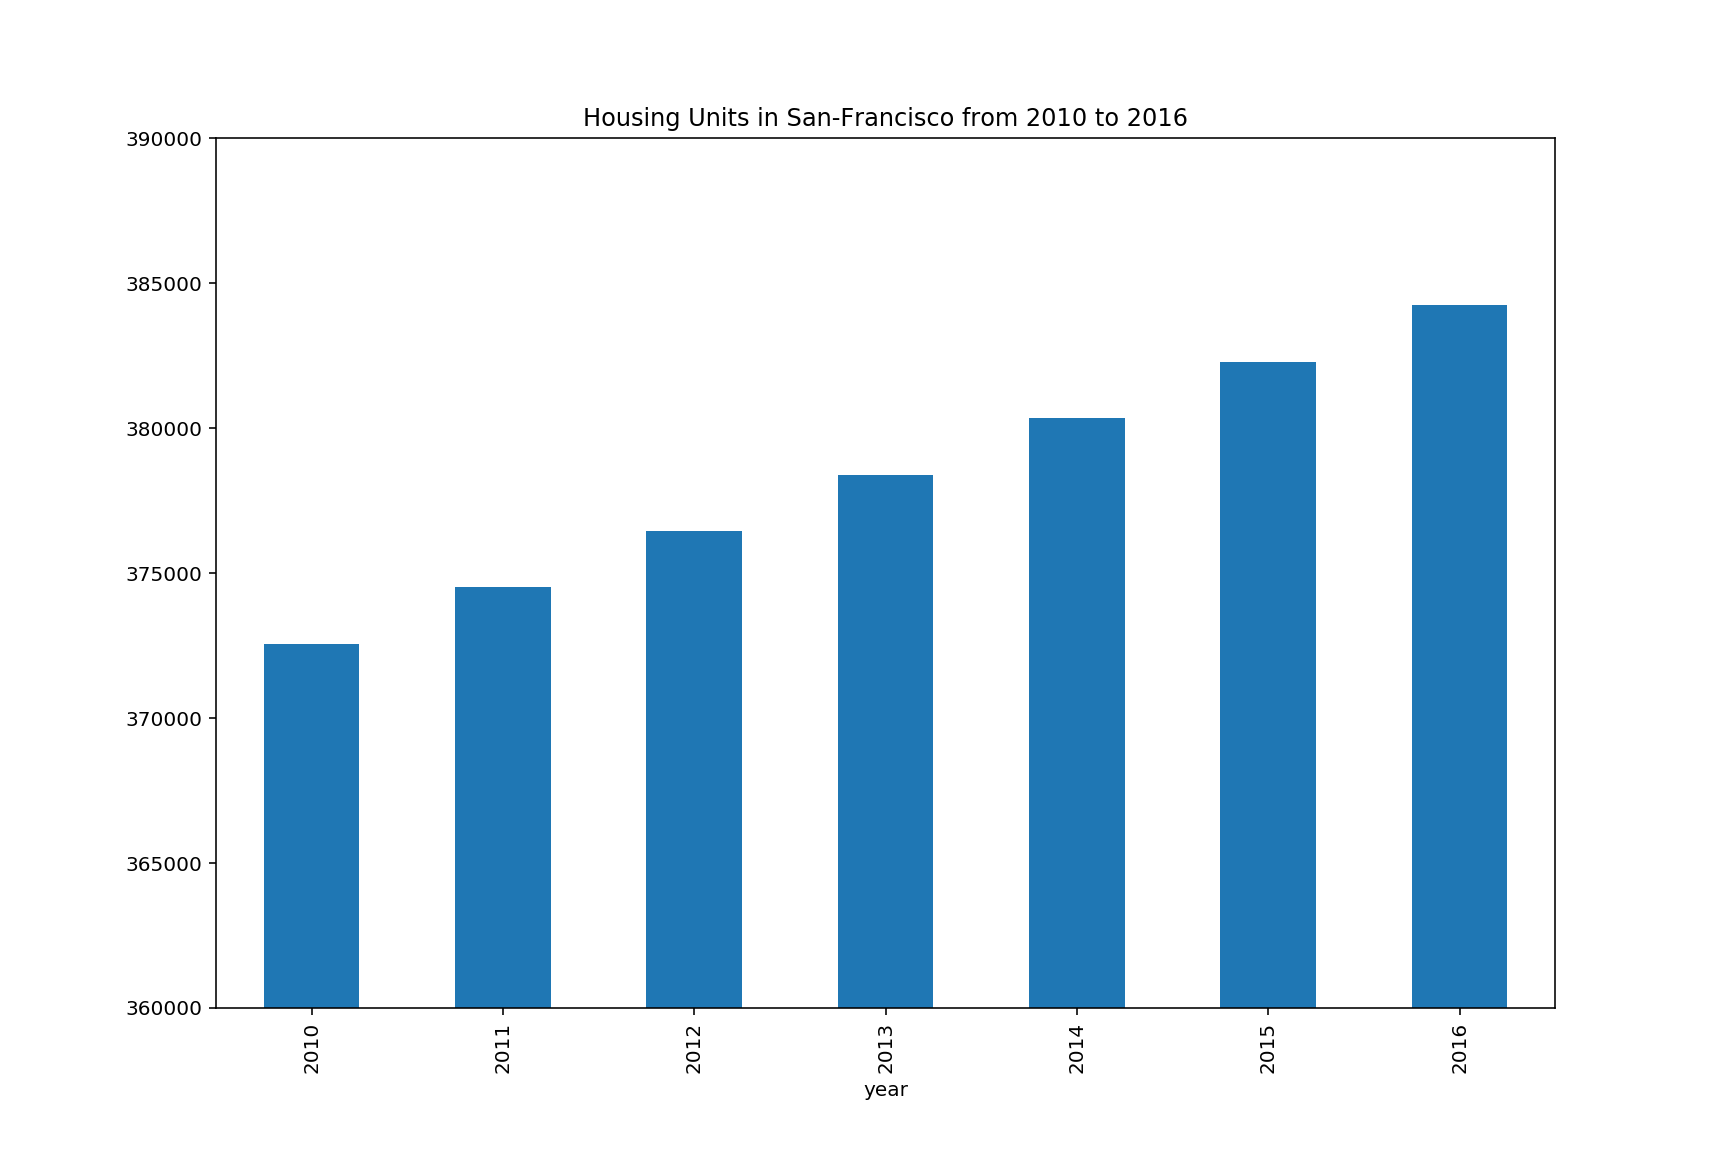
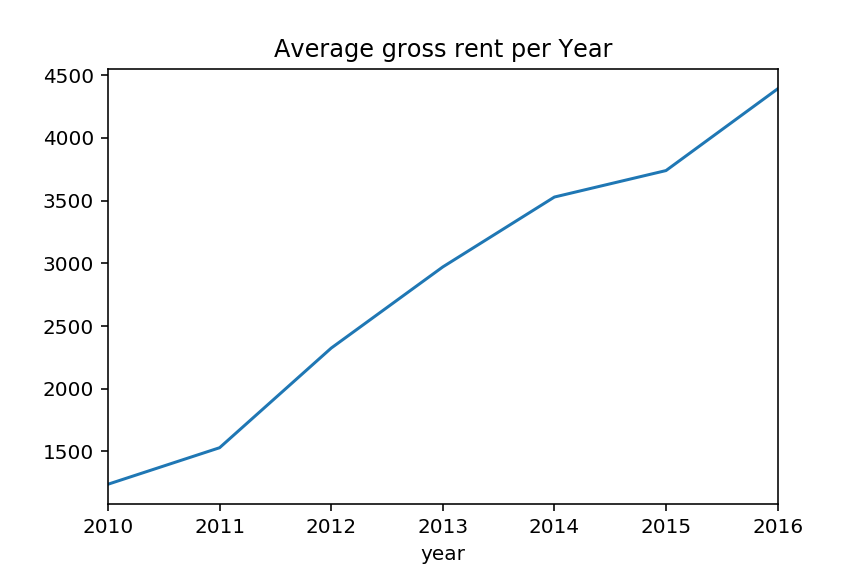
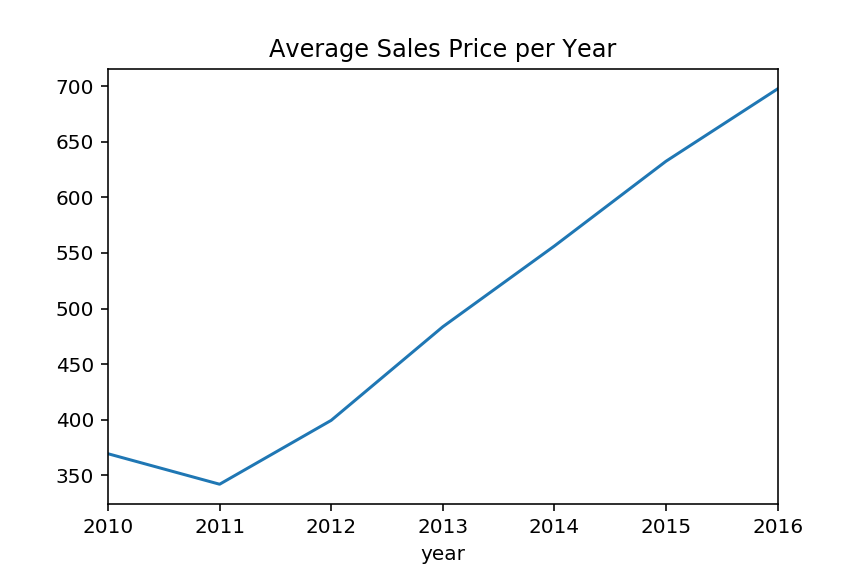

In [17]:
panel.servable()

In [ ]:
# average_sales_price()
# average_gross_rent()
# average_price_by_neighborhood()
# top_most_expensive_neighborhoods()
# parallel_coordinates()
# neighborhood_map()